In [8]:
import numpy as np
from scipy.signal import triang
from scipy.fftpack import fft
from scipy.signal import get_window

In [2]:
%matplotlib inline
from matplotlib.pyplot import plot

In [3]:
import sys
import os
import math 

In [4]:
# add to path
sys.path.append(os.path.join(os.getcwd(), '../software/models/'))
print(sys.path)

['/Users/atul/Projects/dev-workspace/Audio-Processing/sms-tools/workspace', '/Users/atul/miniconda3/envs/PY39/lib/python39.zip', '/Users/atul/miniconda3/envs/PY39/lib/python3.9', '/Users/atul/miniconda3/envs/PY39/lib/python3.9/lib-dynload', '', '/Users/atul/miniconda3/envs/PY39/lib/python3.9/site-packages', '/Users/atul/Projects/dev-workspace/Audio-Processing/sms-tools/workspace/../software/models/']


In [5]:
import utilFunctions as UF

In [6]:
import dftModel as DFT

In [7]:
PIANO = '../sounds/piano.wav'
fs, x = UF.wavread(PIANO)

In [9]:
# window
M = 511
w = get_window('hamming', M)

In [10]:
time = 0.2
# get a small window of M samples
x1 = x[int(time * fs): int(time*fs) + M]


In [11]:
# DFT size - and get the DFT analysis of the small fragment of the sound
N = 1024
mX, pX = DFT.dftAnal(x1, w, N)

In [12]:
# get inverse DFT via synthesis; has to be normalized 
y = DFT.dftSynth(mX, pX, w.size) * sum(w)

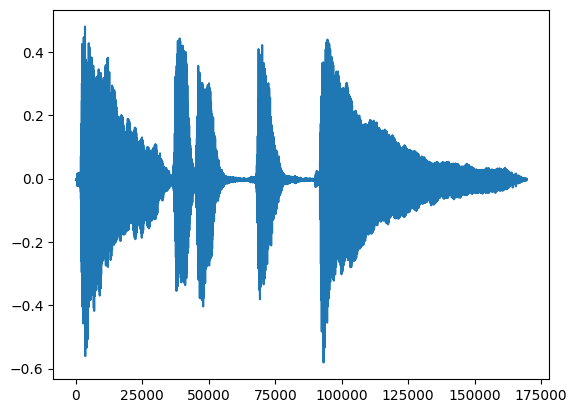

In [13]:
# plots
plot(x)

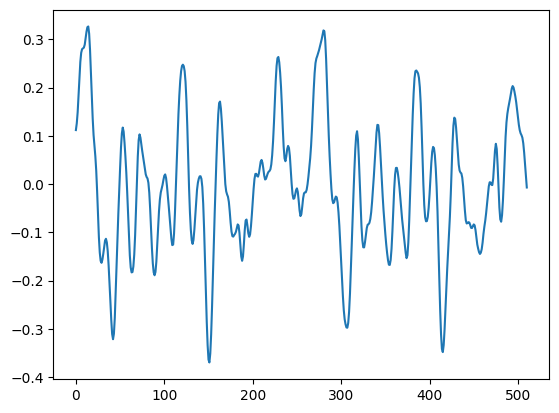

In [14]:
# plot the fragment x1
plot(x1)

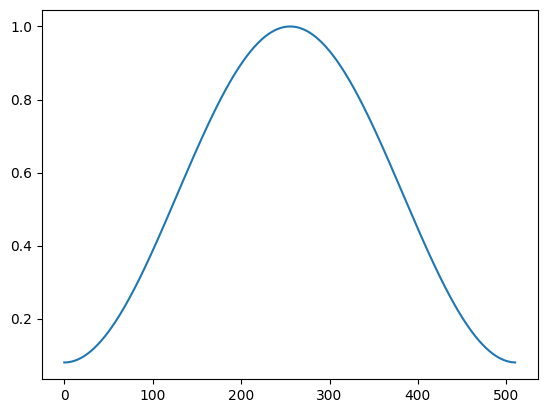

In [15]:
# plot the window w
plot(w)

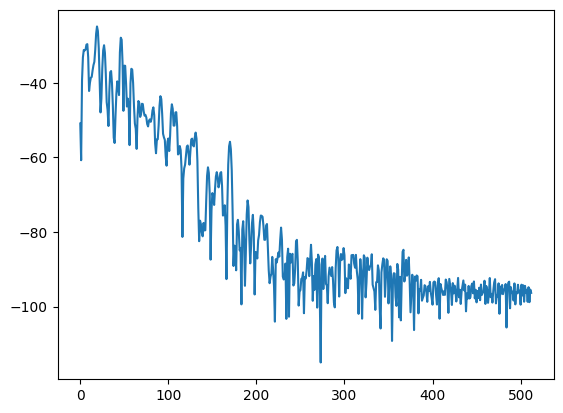

In [18]:
# plot the mag spectrum
plot(mX) # plots only the first half - bcos second half is redundant

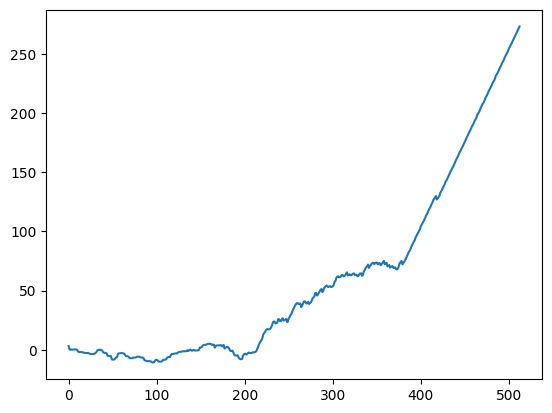

In [19]:
# plot the phase
plot(pX)

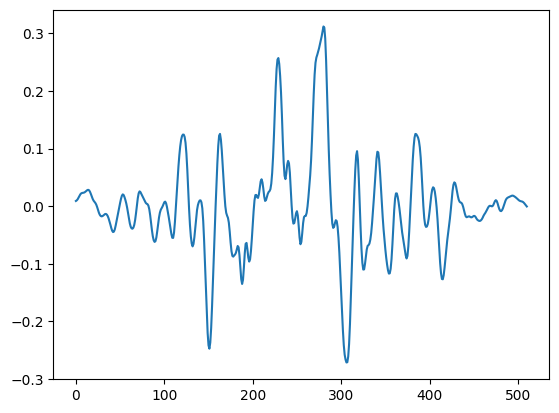

In [20]:
# plot the synth 
plot(y)

# Full analysis and synthesis of a sound fragment - using DFT and Inverse DFT

The following code is from `dftModel_function.py` in the `software/models_interface` directory. 
Shows one full example of analysis and synthesis of a Piano sound fragment

In [21]:
import matplotlib.pyplot as plt 

In [24]:
def main(inputFile = '../sounds/piano.wav', window = 'blackman', M = 511, N = 1024, time = .2):
    """
    inputFile: input sound file (monophonic with sampling rate of 44100)
    window: analysis window type (choice of rectangular, hann, hamming, blackman, blackmanharris)
    M: analysis window size (odd integer value)
    N: fft size (power of two, bigger or equal than than M)
    time: time  to start analysis (in seconds)
    """

    # read input sound (monophonic with sampling rate of 44100)
    fs, x = UF.wavread(inputFile)

    # compute analysis window
    w = get_window(window, M)

    # get a fragment of the input sound of size M
    sample = int(time*fs)
    if (sample+M >= x.size or sample < 0):                          # raise error if time outside of sound
        raise ValueError("Time outside sound boundaries")
    x1 = x[sample:sample+M]

    # compute the dft of the sound fragment
    mX, pX = DFT.dftAnal(x1, w, N)

    # compute the inverse dft of the spectrum
    y = DFT.dftSynth(mX, pX, w.size)*sum(w)

    # create figure
    plt.figure(figsize=(9, 6))

    # plot the sound fragment
    plt.subplot(4,1,1)
    plt.plot(time + np.arange(M)/float(fs), x1)
    plt.axis([time, time + M/float(fs), min(x1), max(x1)])
    plt.ylabel('amplitude')
    plt.xlabel('time (sec)')
    plt.title('input sound: x')

    # plot the magnitude spectrum
    plt.subplot(4,1,2)
    plt.plot(float(fs)*np.arange(mX.size)/float(N), mX, 'r')
    plt.axis([0, fs/2.0, min(mX), max(mX)])
    plt.title ('magnitude spectrum: mX')
    plt.ylabel('amplitude (dB)')
    plt.xlabel('frequency (Hz)')
    # plot the phase spectrum
    plt.subplot(4,1,3)
    plt.plot(float(fs)*np.arange(pX.size)/float(N), pX, 'c')
    plt.axis([0, fs/2.0, min(pX), max(pX)])
    plt.title ('phase spectrum: pX')
    plt.ylabel('phase (radians)')
    plt.xlabel('frequency (Hz)')

    # plot the sound resulting from the inverse dft
    plt.subplot(4,1,4)
    plt.plot(time + np.arange(M)/float(fs), y)
    plt.axis([time, time + M/float(fs), min(y), max(y)])
    plt.ylabel('amplitude')
    plt.xlabel('time (sec)')
    plt.title('output sound: y')

    plt.tight_layout()
    plt.ion()
    plt.show()

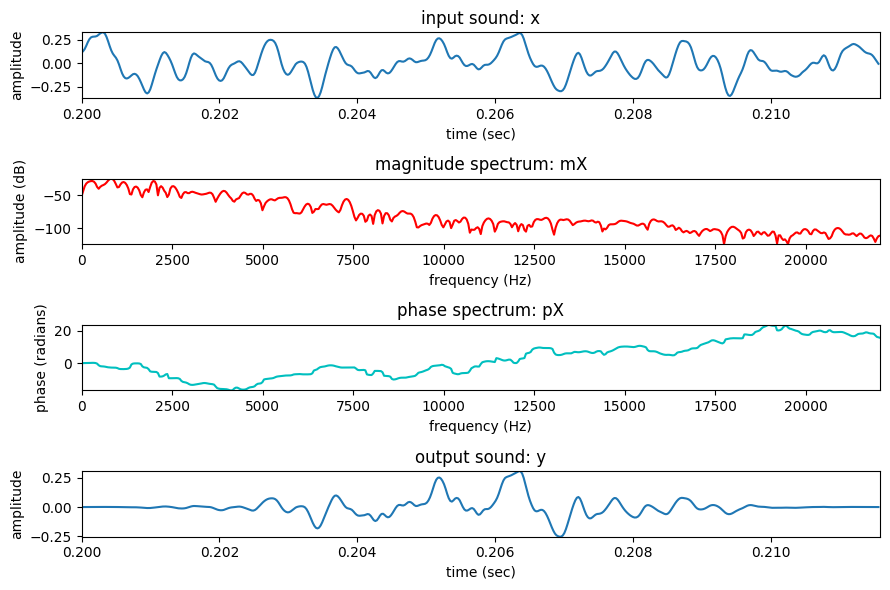

In [25]:
main()